In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import random


# Item Selection

all the assets that had data from 2008-01-01 among the S&P500 stock list selected.

In [2]:
path = 'C:\\Users\\saira\\Desktop\\arima_lstm_model\\stock_data'
stock08 = []
for file in os.listdir(path):
    file_path = path + '/' + file
    date = pd.read_csv(file_path)['Date']
    if len(date)>0 and pd.read_csv(file_path)['Date'][0] <= '2008-01-01' :
        stock08.append(file)
print(str(len(stock08))+" stocks selected")
print(stock08)

446 stocks selected
['A.csv', 'AAL.csv', 'AAP.csv', 'AAPL.csv', 'ABC.csv', 'ABT.csv', 'ACN.csv', 'ADBE.csv', 'ADI.csv', 'ADM.csv', 'ADP.csv', 'ADS.csv', 'ADSK.csv', 'AEE.csv', 'AEP.csv', 'AES.csv', 'AET.csv', 'AFL.csv', 'AGN.csv', 'AIG.csv', 'AIV.csv', 'AIZ.csv', 'AJG.csv', 'AKAM.csv', 'ALB.csv', 'ALGN.csv', 'ALK.csv', 'ALL.csv', 'ALXN.csv', 'AMAT.csv', 'AMD.csv', 'AME.csv', 'AMG.csv', 'AMGN.csv', 'AMP.csv', 'AMT.csv', 'AMZN.csv', 'ANSS.csv', 'ANTM.csv', 'AON.csv', 'AOS.csv', 'APA.csv', 'APC.csv', 'APD.csv', 'APH.csv', 'ARE.csv', 'ARNC.csv', 'ATVI.csv', 'AVB.csv', 'AVY.csv', 'AXP.csv', 'AYI.csv', 'AZO.csv', 'BA.csv', 'BAC.csv', 'BAX.csv', 'BBT.csv', 'BBY.csv', 'BDX.csv', 'BEN.csv', 'BF.B.csv', 'BIIB.csv', 'BK.csv', 'BLK.csv', 'BLL.csv', 'BMY.csv', 'BRK.B.csv', 'BSX.csv', 'BWA.csv', 'BXP.csv', 'C.csv', 'CA.csv', 'CAG.csv', 'CAH.csv', 'CAT.csv', 'CB.csv', 'CBS.csv', 'CCI.csv', 'CCL.csv', 'CDNS.csv', 'CELG.csv', 'CERN.csv', 'CF.csv', 'CHD.csv', 'CHRW.csv', 'CI.csv', 'CINF.csv', 'CL.csv', 

# Organize Data

In order to keep concise and deal with missing data, all the price data of the selected items above concatenated to a single data frame

In [3]:
stock_price_dict = {}

for file in stock08 :
    path = os.path.join('C:\\Users\\saira\\Desktop\\arima_lstm_model\\stock_data', file)
    df = pd.read_csv(path)
    df = df[df.Date >= '2008-01-01']
    pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.set_index(pd.DatetimeIndex(df['Date']))
    stock_price_dict[file.split(".")[0]] = df['Adj. Close']

market_path = 'C:\\Users\\saira\\Desktop\\arima_lstm_model\\SP500_index.csv'

df = pd.read_csv(market_path)

# Fix: Convert using correct format and assign back
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Then set index
df = df.set_index(pd.DatetimeIndex(df['Date']))

stock_price_dict['SP500'] = df['Adj Close']

    
stock_price_df = pd.DataFrame(stock_price_dict)

In [4]:
print(stock_price_df.head())

                    A        AAL        AAP       AAPL        ABC        ABT  \
Date                                                                           
2008-01-02  24.765337  34.609917  36.353428  25.039656  19.399748  20.518491   
2008-01-03  24.519730  33.050912  36.701586  25.051222  19.517323  20.393490   
2008-01-04  23.721509  32.245426  34.496589  23.138934  19.073153  20.511138   
2008-01-07  24.110386  31.777724  36.053626  22.829216  19.325720  21.139817   
2008-01-08  24.076274  28.607747  34.196787  22.008012  19.878755  21.694967   

                  ACN   ADBE        ADI        ADM  ...        XEL         XL  \
Date                                                ...                         
2008-01-02  29.385905  41.71  23.023535  35.939893  ...  14.938655  38.246913   
2008-01-03  28.880657  41.79  22.674809  36.313108  ...  15.026252  38.666370   
2008-01-04  28.448751  40.36  22.083490  36.408398  ...  14.857797  38.048624   
2008-01-07  27.682729  40.24  21.8

# Dealing with Missing Data

In [5]:
NA_col = []
NA_ratio = []
for col in stock_price_df.columns :
    na_index = np.where(stock_price_df[col].isnull())[0]
    NA_col.append(col)
    NA_ratio.append(len(na_index)/stock_price_df.shape[0] * 100)
    print(col,na_index)
NA_df = pd.DataFrame({'tickers':NA_col,'NA_ratio':NA_ratio})


A [2338 2483]
AAL [2338 2483]
AAP [2338 2483]
AAPL [2338 2417 2483]
ABC [2338 2483]
ABT [2338 2481 2483]
ACN [2338 2483]
ADBE [2338 2417 2483]
ADI [2338 2483]
ADM [2338 2483]
ADP [2338 2483]
ADS [2338 2483]
ADSK [2338 2483]
AEE [2338 2483]
AEP [2338 2483]
AES [2338 2483]
AET [2338 2483]
AFL [2338 2483]
AGN [2338 2483]
AIG [2338 2483]
AIV [2338 2483]
AIZ [2338 2483]
AJG [2338 2483]
AKAM [2338 2417 2483]
ALB [2338 2483]
ALGN [2338 2483]
ALK [2338 2483]
ALL [2338 2483]
ALXN [2338 2483]
AMAT [2338 2483]
AMD [2338 2483]
AME [2338 2483]
AMG [2338 2483]
AMGN [2338 2483]
AMP [2338 2483]
AMT [2338 2483]
AMZN [2338 2417 2483]
ANSS [2338 2483]
ANTM [2338 2483]
AON [2338 2483]
AOS [2338 2483]
APA [2338 2483]
APC [2338 2483]
APD [2338 2483]
APH [2338 2483]
ARE [2338 2483]
ARNC [2338 2483]
ATVI [2338 2417 2483]
AVB [2338 2483]
AVY [2338 2483]
AXP [2338 2483]
AYI [2338 2483]
AZO [2338 2483]
BA [2338 2483]
BAC [2338 2483]
BAX [2338 2483]
BBT [2338 2483]
BBY [2338 2483]
BDX [2338 2483]
BEN [2338 2483]


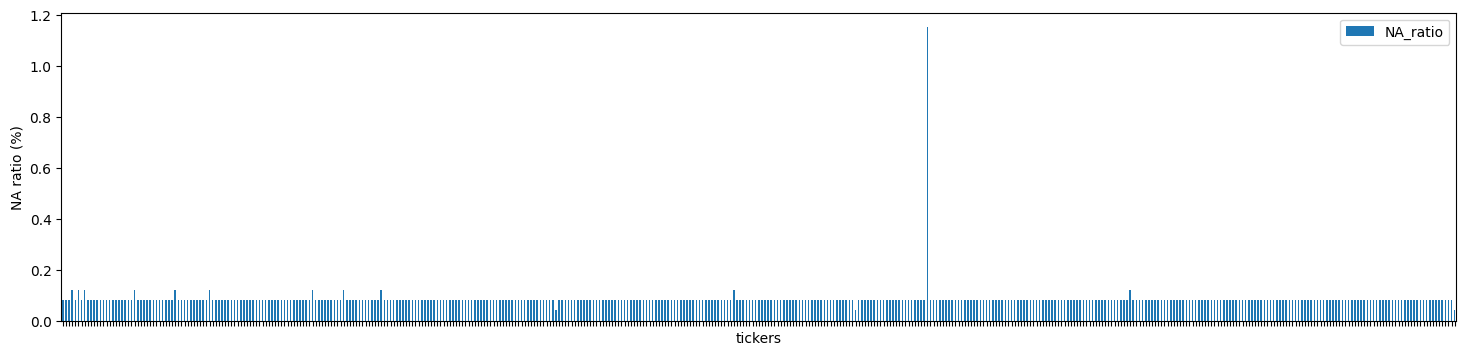

In [6]:
NA_df.plot.bar(rot=0, figsize=(18,4))
plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.xlabel('tickers')
plt.ylabel('NA ratio (%)')
plt.show()
plt.close()

Most of the dataset that has missing data has only one or two data points missing. It would be rational enough to impute the data points with the data from the day right before.

However, one company has quite some missing data. 'MMM' is the only company that has high proportion of missing data. Leaving out this one company from the S&P 500 firms wouldn't be a big issue. So drop the 'MMM' column the dataframe

In [7]:
stock_price_df = stock_price_df.drop(['MMM'], axis=1)

In [10]:
def impute_data(column_name):
    index = stock_price_df.index.values[0]
    price_na_index = np.where(stock_price_df[column_name].isnull())[0]
    for i in price_na_index :
        stock_price_df.loc[i, column_name] = stock_price_df.loc[i - 1, column_name]

In [11]:
for item in stock_price_df.columns :
    impute_data(item)

In [12]:
# Final Check for NaN
for item in stock_price_df.columns :
    if stock_price_df[item].isnull().values.any() :
        print('stock price data of '+item+' still has NaN')
print("END OF CHECKING. NO NA REMAINING")

END OF CHECKING. NO NA REMAINING


In [13]:
stock_price_df.to_csv('C:\\Users\\saira\\Desktop\\arima_lstm_model\\stock08_price.csv', index_label='Date')


# Create Portfolio

out of 505 companies, 150 firms are randomly selected for the portfolio.

In [14]:
df = pd.read_csv('C:\\Users\\saira\\Desktop\\arima_lstm_model\\stock08_price.csv')
universe = list(df.columns.values[1:])
universe.remove("SP500")
print(universe)

['A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVY', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BF', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BRK', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBS', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CHD', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN',

In [15]:
random.shuffle(universe)
portfolio = universe[:150].copy()

print(portfolio)

['FISV', 'PNR', 'MRK', 'DOV', 'XEC', 'TAP', 'WU', 'STZ', 'MSI', 'DE', 'RTN', 'AOS', 'IRM', 'PSA', 'INCY', 'ADP', 'ED', 'BAC', 'HAL', 'HBAN', 'HES', 'COL', 'OMC', 'DVN', 'SCHW', 'AMAT', 'AFL', 'AAPL', 'WEC', 'GGP', 'CI', 'CAG', 'CDNS', 'VFC', 'FLIR', 'CAH', 'ALK', 'MHK', 'AEP', 'CSX', 'KR', 'NWL', 'NBL', 'BAX', 'USB', 'HP', 'K', 'LLL', 'MAA', 'GLW', 'LKQ', 'WAT', 'MNST', 'ARNC', 'DVA', 'MET', 'WFC', 'MYL', 'GRMN', 'NOC', 'NFX', 'XLNX', 'UAL', 'AMZN', 'FOXA', 'HUM', 'GPN', 'NKE', 'VRSN', 'MAR', 'SBAC', 'PKG', 'AGN', 'EIX', 'SWK', 'RHI', 'AZO', 'C', 'NTAP', 'VLO', 'SJM', 'PG', 'APD', 'LEN', 'ISRG', 'CCI', 'VAR', 'AES', 'CHD', 'TWX', 'DHI', 'EOG', 'BXP', 'TXT', 'TGT', 'AVY', 'IT', 'SNA', 'PEP', 'SYY', 'AXP', 'GPC', 'NEM', 'GPS', 'TSS', 'UPS', 'ABC', 'FOX', 'AVB', 'TMO', 'PH', 'WHR', 'IR', 'SEE', 'AJG', 'DGX', 'LNT', 'AIG', 'COG', 'REG', 'LUK', 'JCI', 'DHR', 'ANTM', 'HSIC', 'HAS', 'JWN', 'AMP', 'CERN', 'SCG', 'TJX', 'LEG', 'COO', 'BA', 'CA', 'MON', 'SIVB', 'KO', 'FITB', 'FDX', 'FRT', 'DFS',

In [16]:
#FOR LIST REUSE#FOR LIS 
portfolio = ['CELG', 'PXD', 'WAT', 'LH', 'AMGN', 'AOS', 'EFX', 'CRM', 'NEM', 'JNPR', 'LB', 'CTAS', 'MAT', 'MDLZ', 'VLO', 'APH', 'ADM', 'MLM', 'BK', 'NOV', 'BDX', 'RRC', 'IVZ', 'ED', 'SBUX', 'GRMN', 'CI', 'ZION', 'COO', 'TIF', 'RHT', 'FDX', 'LLL', 'GLW', 'GPN', 'IPGP', 'GPC', 'HPQ', 'ADI', 'AMG', 'MTB', 'YUM', 'SYK', 'KMX', 'AME', 'AAP', 'DAL', 'A', 'MON', 'BRK', 'BMY', 'KMB', 'JPM', 'CCI', 'AET', 'DLTR', 'MGM', 'FL', 'HD', 'CLX', 'OKE', 'UPS', 'WMB', 'IFF', 'CMS', 'ARNC', 'VIAB', 'MMC', 'REG', 'ES', 'ITW', 'NDAQ', 'AIZ', 'VRTX', 'CTL', 'QCOM', 'MSI', 'NKTR', 'AMAT', 'BWA', 'ESRX', 'TXT', 'EXR', 'VNO', 'BBT', 'WDC', 'UAL', 'PVH', 'NOC', 'PCAR', 'NSC', 'UAA', 'FFIV', 'PHM', 'LUV', 'HUM', 'SPG', 'SJM', 'ABT', 'CMG', 'ALK', 'ULTA', 'TMK', 'TAP', 'SCG', 'CAT', 'TMO', 'AES', 'MRK', 'RMD', 'MKC', 'WU', 'ACN', 'HIG', 'TEL', 'DE', 'ATVI', 'O', 'UNM', 'VMC', 'ETFC', 'CMA', 'NRG', 'RHI', 'RE', 'FMC', 'MU', 'CB', 'LNT', 'GE', 'CBS', 'ALGN', 'SNA', 'LLY', 'LEN', 'MAA', 'OMC', 'F', 'APA', 'CDNS', 'SLG', 'HP', 'XLNX', 'SHW', 'AFL', 'STT', 'PAYX', 'AIG', 'FOX', 'MA']

# Prepare the Data

In [17]:
def rolling_corr(item1,item2) :
    #import data
    stock_price_df = pd.read_csv('C:\\Users\\saira\\Desktop\\arima_lstm_model\\stock08_price.csv')
    pd.to_datetime(stock_price_df['Date'], format='%Y-%m-%d')
    stock_price_df = stock_price_df.set_index(pd.DatetimeIndex(stock_price_df['Date']))
    
    #calculate
    df_pair = pd.concat([stock_price_df[item1], stock_price_df[item2]], axis=1)
    df_pair.columns = [item1,item2]
    df_corr = df_pair[item1].rolling(window=100).corr(df_pair[item2])
    return df_corr


In [19]:
index_list = []
for _ in range(100):
    indices = []
    for k in range(_, 2420,100):
        indices.append(k)
    index_list.append(indices)
    
data_matrix = []
count = 0
for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        file_name = a + '_' + b
            
        corr_series = rolling_corr(a, b)[99:]
        for _ in range(100):
            corr_strided = list(corr_series.iloc[index_list[_]][:24]).copy()
            data_matrix.append(corr_strided)
            count+=1
            if count % 1000 == 0 :
                print(str(count)+' items preprocessed')
                
data_matrix = np.transpose(data_matrix)
data_dictionary = {}
for i in range(len(data_matrix)):
    data_dictionary[str(i)] = data_matrix[i]
data_df = pd.DataFrame(data_dictionary)
data_df.to_csv('C:\\Users\\saira\\Desktop\\arima_lstm_model\\dataset.csv')


1000 items preprocessed
2000 items preprocessed
3000 items preprocessed
4000 items preprocessed
5000 items preprocessed
6000 items preprocessed
7000 items preprocessed
8000 items preprocessed
9000 items preprocessed
10000 items preprocessed
11000 items preprocessed
12000 items preprocessed
13000 items preprocessed
14000 items preprocessed
15000 items preprocessed
16000 items preprocessed
17000 items preprocessed
18000 items preprocessed
19000 items preprocessed
20000 items preprocessed
21000 items preprocessed
22000 items preprocessed
23000 items preprocessed
24000 items preprocessed
25000 items preprocessed
26000 items preprocessed
27000 items preprocessed
28000 items preprocessed
29000 items preprocessed
30000 items preprocessed
31000 items preprocessed
32000 items preprocessed
33000 items preprocessed
34000 items preprocessed
35000 items preprocessed
36000 items preprocessed
37000 items preprocessed
38000 items preprocessed
39000 items preprocessed
40000 items preprocessed
41000 ite